Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [3]:
library('tidymodels')

Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.6     ✔ recipes      1.1.0
✔ dials        1.3.0     ✔ rsample      1.2.1
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.1     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.2.1
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.2     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Search for functions across packages at https://www.tidymodels.org/find/



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [4]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [5]:
glimpse(diabetes_train)

Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 5, 10, 4, 10, 1, 3, 8, 13, 5, 6, 10, 11, 7…
$ Glucose                  <dbl> 85, 116, 115, 110, 139, 103, 126, 99, 145, 10…
$ BloodPressure            <dbl> 66, 74, 0, 92, 80, 30, 88, 84, 82, 75, 92, 78…
$ SkinThickness            <dbl> 29, 0, 0, 0, 0, 38, 41, 0, 19, 26, 0, 31, 0, …
$ Insulin                  <dbl> 0, 0, 0, 0, 0, 83, 235, 0, 110, 0, 0, 0, 0, 0…
$ BMI                      <dbl> 26.6, 25.6, 35.3, 37.6, 27.1, 43.3, 39.3, 35.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.201, 0.134, 0.191, 1.441, 0.183, 0.7…
$ Age                      <dbl> 31, 30, 29, 30, 57, 33, 27, 50, 57, 60, 28, 4…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

Outcome. This variable, after looking at the Kaggle page, suggests its the outcome of whether or not someone has diabetes. All of the other variables seem to have potential to be explainer variables. 

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     | Plasma glucose concentration a 2 hours in an oral glucose tolerance test            |
| BMI         | Body mass index (weight in kg/(height in m)^2)            |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

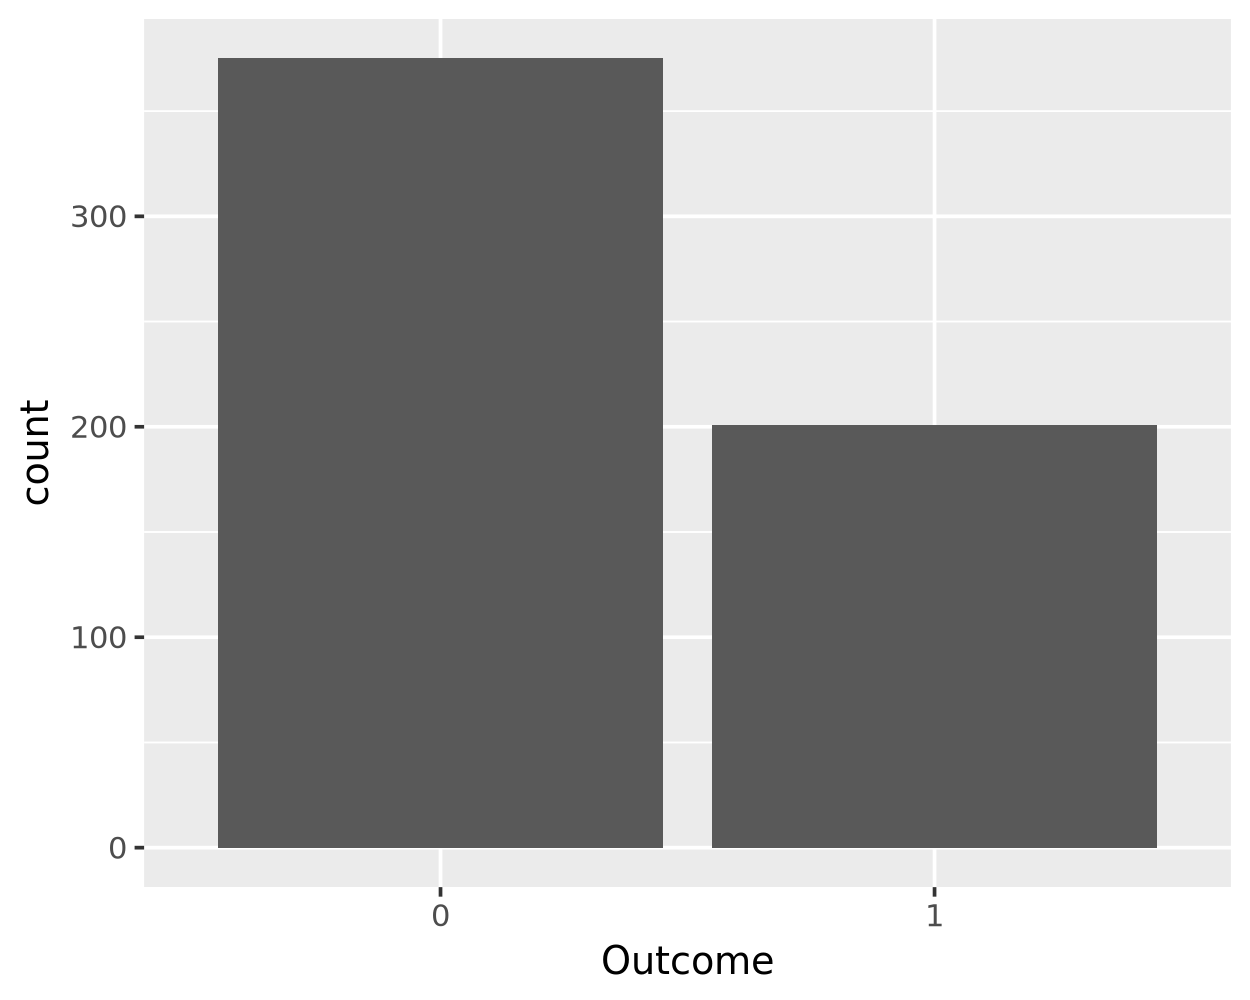

In [21]:
ggplot(diabetes_train, aes(x=Outcome)) + geom_bar()

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

We do not have equal outcomes. Outcome of 0 has roughly ~175 more observations than an Outcome of 1. 



Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [7]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,116.0
0,BMI,25.6
0,Glucose,115.0
0,BMI,35.3


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

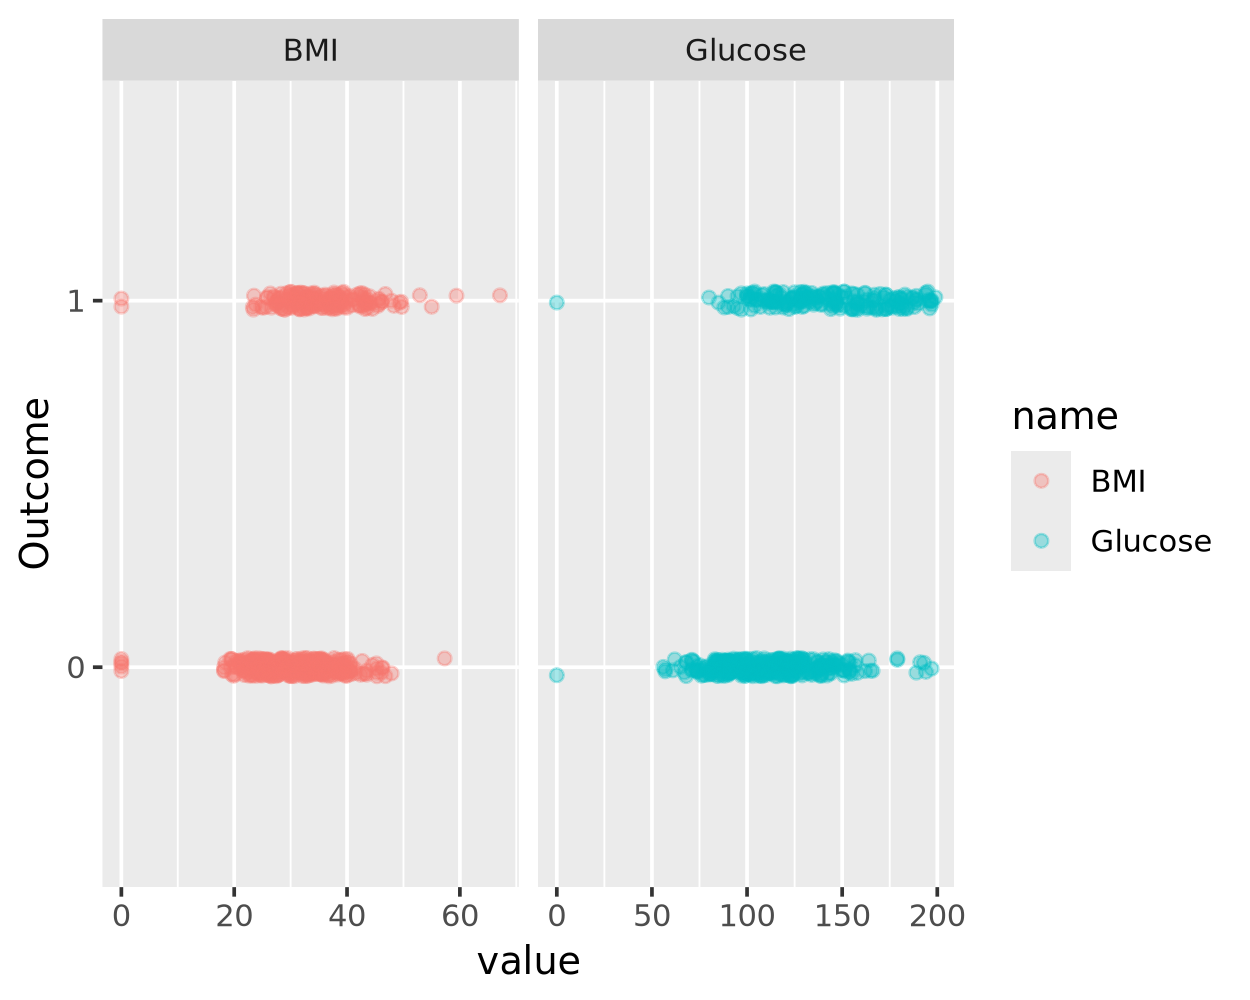

In [11]:
ggplot(plot_df) +
    geom_point(aes(x = value, y = Outcome, color = name),
               alpha = 0.35,
               position = position_jitter(height = 0.025, width = 0))+
    facet_wrap(~name, ncol = 2, scales = 'free_x')

❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

scales = 'free_x' scales the data down into a more visually appealing format. If it was not present in the facet wrap, the data would be too small and the significant amount of overlap would make it tough to interpret.

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [12]:
mod = logistic_reg() |> set_engine('glm')
mod_fit = mod |> fit(Outcome ~ BMI + Glucose, diabetes_train)

tidy(mod_fit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-8.07037203,0.737022226,-10.949971,6.646887e-28
BMI,0.08215962,0.015820010,5.193399,2.064889e-07
Glucose,0.03770765,0.003897164,9.675666,3.825932e-22


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [17]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 111  35
         1  14  32

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

1. 67 people. It's the "True Positive" + "False Negative" = 32+35 = 67
2. 32 people. This is the "True positive" where the model correctly identifies who has diabetes. 
3. 14 people. This is the "False Positive" where the model predicts someone has diabetes, but in fact they do not. 
